In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [2]:

global params
params = {
    "m": 730,
    "g": 9.81,
    "S":15
}

In [3]:
df = pd.read_table('../input/excel.txt', sep = "\t")
print(df.columns)
# print(df.dtypes)

p_cz_sam_i = np.polyfit(df['C_x samolot'], df['C_z samolotu'], 20)
p_cz_sam = np.poly1d(p_cz_sam_i)

 


Index(['alpha', 'cz_inter', 'cx_inter', 'cz', 'cx', 'cx' ', 'c'x_p',
       'a_i [deg]', 'a_p [deg]', 'cz_h', 'cx_h', 'cx_szkodliwe', 'C_x samolot',
       'C_z samolotu', 'K', 'E'],
      dtype='object')


c:\Users\marek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


## tworzenie modeli do interpolacji 
- $E(C_z)$
- $Cz_{samolotu\;interpolowane}(alpha)$

In [4]:
# tworzenie zinterpolowanego c_z samolotu
cz_inter = np.polyfit(df['alpha'], df['C_z samolotu'], 15)
p_cz_inter = np.poly1d(cz_inter)
df["C_z samolotu inter"] = p_cz_inter(df['alpha'])

# plt.plot(df['alpha'], df["C_z samolotu inter"], color =  'red')
# plt.plot(df['alpha'], df["C_z samolotu"], color =  'black')


# tworzenie zinterpolowanego E
e_inter = np.polyfit(df["C_z samolotu inter"],  df["E"], 15)
p_e_inter = np.poly1d(e_inter)

# plt.plot(df['alpha'])
print("maks cz:",max(df["C_z samolotu inter"]))

maks cz: 1.5790243037217757


## importowanie tabele z projektu 5 z folder sub_tables

In [5]:
import os
rhos = pd.read_table("../input/excel_proj5.txt", sep = ' ')

file_names = os.listdir("../input/sub_tables")
sub_dfs = [pd.read_csv(f"../input/sub_tables/{name}") for name in file_names]
# print(sub_dfs[0].columns)

def get_max_nr(small_df):
    for i, row in small_df.iterrows():
        if row["V"] > 54:
            return row["Nr"]
    
    # max(s_df['Nr'])

height_power_rho = [{"height":float(name.replace("height_", '').replace(".csv", '')), "Nr": get_max_nr(s_df), "rho":rho} for name, s_df, rho in zip(file_names, sub_dfs, rhos['rho(h)'].to_list())]

pprint(height_power_rho)


[{'Nr': 60.05, 'height': 0.0, 'rho': 1.225},
 {'Nr': 55.797, 'height': 0.5, 'rho': 1.167},
 {'Nr': 51.687, 'height': 1.0, 'rho': 1.111},
 {'Nr': 45.927, 'height': 1.5, 'rho': 1.032},
 {'Nr': 44.042, 'height': 2.0, 'rho': 1.006},
 {'Nr': 42.056, 'height': 2.5, 'rho': 1.0},
 {'Nr': 39.289, 'height': 3.0, 'rho': 0.908},
 {'Nr': 35.869, 'height': 3.5, 'rho': 0.863},
 {'Nr': 32.545, 'height': 4.0, 'rho': 0.819},
 {'Nr': 28.714, 'height': 4.5, 'rho': 0.768},
 {'Nr': 26.338, 'height': 5.0, 'rho': 0.736},
 {'Nr': 23.469, 'height': 5.5, 'rho': 0.697}]


In [6]:
# for edf in sub_dfs:
#     display(edf)

## tworzenie funkcji

In [7]:
def v_hor(cz, rho):
    return ( (2*params["m"]*params['g'])/ (rho*params['S']) * 1/cz )**(1/2)

def Nn(rho, E):
    return params["m"]*params['g'] * ( (2*params["m"]*params['g'])/ (rho*params['S']) * 1/E )**(1/2)

def w(Nr, Nn):
    return (Nr-Nn)/(params["m"]*params['g'])

def gamma(w, v):
    return np.arcsin(w/v)

In [8]:
cz_list = np.linspace(0.2, 1.5, 15)

calculated_dfs = []

for pack in height_power_rho:
    
    # print(f"height {pack['height']}")
    
    pack["Nr"] = pack["Nr"]*1000
    
    df_temp = pd.DataFrame()
    df_temp["cz"] = cz_list
    
    df_temp["V"]            = v_hor(df_temp["cz"], pack['rho'])
    df_temp["Nn"]           = Nn(pack['rho'], p_e_inter(df_temp["cz"]))
    df_temp["Nr"]           = pack['Nr']
    df_temp["deltaN"]       =  - df_temp["Nn"] + df_temp["Nr"]
    df_temp["w"]            = w(pack['Nr'], df_temp["Nn"])
    df_temp["gamma"]        = gamma(df_temp["w"], df_temp["V"])
    
    calculated_dfs.append({"height":pack['height'], "df":df_temp})
    # display(df_temp)
    # breakb

display(calculated_dfs[0])

{'height': 0.0,
 'df':           cz          V             Nn       Nr        deltaN         w  \
 0   0.200000  62.428408  112912.646383  60050.0 -52862.646383 -7.381711   
 1   0.292857  51.590454   66225.771364  60050.0  -6175.771364 -0.862381   
 2   0.385714  44.953592   47111.330208  60050.0  12938.669792  1.806749   
 3   0.478571  40.357465   37312.010255  60050.0  22737.989745  3.175120   
 4   0.571429  36.933144   31666.368956  60050.0  28383.631044  3.963475   
 5   0.664286  34.254671   28160.291487  60050.0  31889.708513  4.453061   
 6   0.757143  32.085465   25846.617708  60050.0  34203.382292  4.776142   
 7   0.850000  30.282226   24231.346171  60050.0  35818.653829  5.001697   
 8   0.942857  28.752414   23052.212536  60050.0  36997.787464  5.166351   
 9   1.035714  27.433251   22177.994520  60050.0  37872.005480  5.288426   
 10  1.128571  26.280446   21548.729438  60050.0  38501.270562  5.376296   
 11  1.221429  25.261738   21140.861460  60050.0  38909.138540  5.

##  Wykresiki

### w(V)

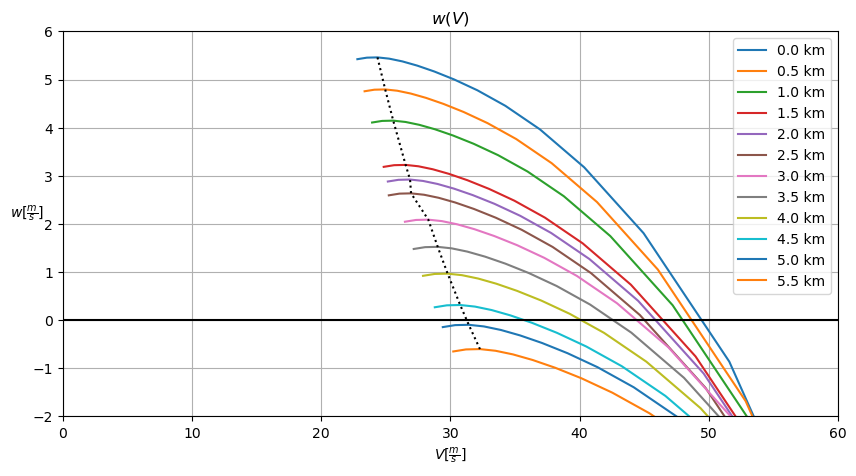

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))

w_maxes, v_maxes = [], []
heights, v_gamma = [], []
gamma_max = []

v_max_i, v_min_i = [],[]

out = open("../output/latex_tables.txt", "w")

for el in calculated_dfs:
    sdf = el['df']
    # print(sdf.columns)
    tempo = sdf[['V', 'gamma']]
    
    # v_gamma_temp = sdf[sdf['gamma'] == max(sdf['gamma'])]
    # v_gamma.append(v_gamma_temp)
    heights.append(el['height'])

    
    # print(el["height"])
    # display(tempo)
    
    # display(sdf)
    temp_p = np.polyfit(sdf['w'], sdf["V"], 4)
    p_temp_p = np.poly1d(temp_p)
    
    
    # fig,ax = plt.subplots()
    # ax.plot(sdf['w'], sdf["V"])
    # w_i = np.arange(0, 5, 10)
    # ax.plot(w_i, p_temp_p(w_i))
    
    # print(p_temp_p(0))
    # print(p_temp_p(max(sdf['w'])))
    
        
    v_max_i.append(p_temp_p(0))
    v_min_i.append(p_temp_p(max(sdf['w'])))
    
    for i, row in sdf.iterrows():
        if row['w'] == max(sdf['w']):
            w_maxes.append(max(sdf['w']))
            v_maxes.append(row["V"])
            # v_min_i.append(row["V"])

        if row['gamma'] == max(sdf['gamma']):
            v_gamma.append(row['V'])
    
    gamma_max.append(max(sdf['gamma']))
    
    ax.plot(sdf["V"], sdf['w'], label = f"{el['height']} km" )
    
    latexowe = sdf.style.set_table_styles(
        [
            {"selector": "toprule", "props": ":hline;"},
            {"selector": "midrule", "props": ":hline;"},
            {"selector": "bottomrule", "props": ":hline;"},
        ]    
    ).format(precision = 3).to_latex(
            caption= f"Wysokość {el['height']} km",
             multicol_align='r',
            position="h", 
            position_float="centering"
    )
    
    
    latexowe = latexowe.replace(
        " & cz & V & Nn & Nr & deltaN & w & gamma \\", 
        " & $C_z$ & $V$ & $N_n$ & $N_r$ & $\Delta N$ & $w$ & $\gamma$ \\"
    ).replace(
        "\\begin{tabular}{lrrrrrrr}",
        "\\begin{tabular}{|l|r|r|r|r|r|r|r|}"
    )
    
    out.write(latexowe + "\FloatBarrier\n")
    # break

out.close()


p_w_max_i = np.polyfit(v_maxes, w_maxes, 1)
p_w_max = np.poly1d(p_w_max_i)
# v_maxes = np.arange(22, 35, 15)

ax.plot(v_maxes, w_maxes, c = 'black', linestyle = 'dotted')

# ax.plot(v_maxes, p_w_max(v_maxes), c = 'black', linestyle = 'dotted')
ax.plot([0, 60], [0,0], color = 'black')

ax.plot()
ax.set_xlim([0, 60])
ax.set_ylim([-2, 6])

ax.set_title("$w(V)$")
ax.set_xlabel("$V [\\frac{m}{s}]$")
ax.set_ylabel("$w [\\frac{m}{s}]$", rotation = 0)

ax.grid(True)
ax.legend()

plt.savefig("../output/w_V.jpg", dpi = 200)


### gamma(V)

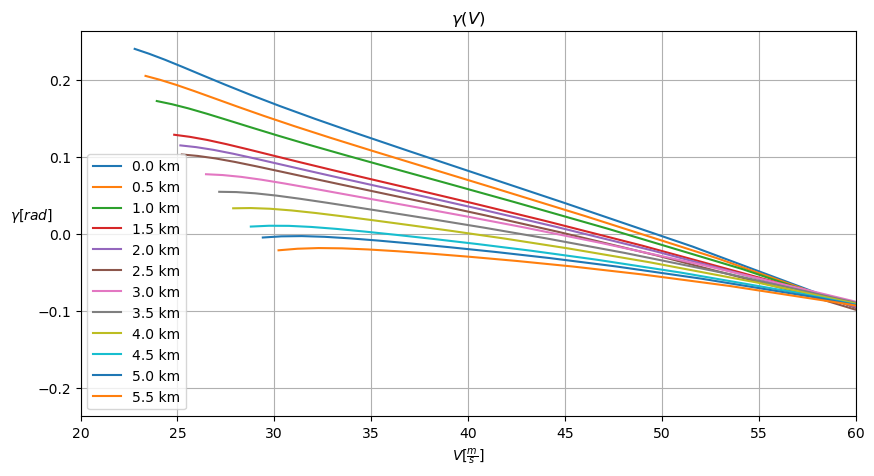

In [10]:
fig, ax = plt.subplots(figsize = (10, 5))

for el in calculated_dfs:
    sdf = el['df']
    
    ax.plot(sdf["V"], sdf['gamma'], label = f"{el['height']} km" )

ax.legend()

# ax.set_xlim([0, 50])

ax.set_title("$ \\gamma (V)$")
ax.set_xlabel("$V [\\frac{m}{s}]$")
ax.set_ylabel("$\\gamma [rad]$", rotation = 0)
ax.set_xlim([20, 60])

ax.grid(True)
ax.legend()

plt.savefig("../output/gamma_V.jpg", dpi = 200)

### wmax(h)

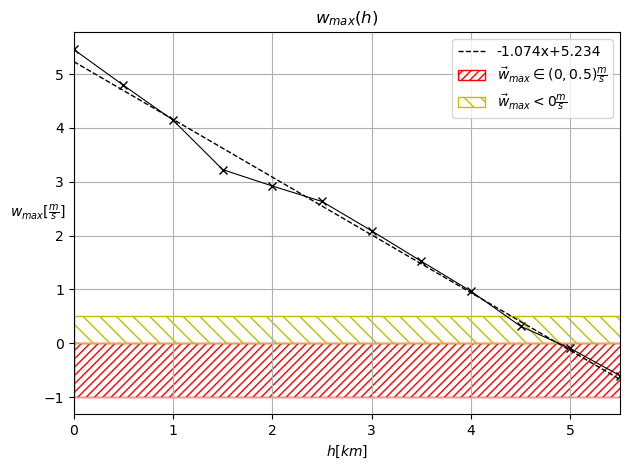

In [11]:
# w_max(h)
fig, ax = plt.subplots()

wmaxs = [max(el['df']["w"]) for el in calculated_dfs]
heights = [el['height'] for el in calculated_dfs]

p_wmax_fit = np.polyfit(heights, wmaxs, 1)
p_wmax = np.poly1d(p_wmax_fit)


ax.plot(heights, wmaxs, color = 'black', marker = 'x', linewidth = 0.8)
ax.plot(heights, p_wmax(heights), label = f'{"x+".join([str(round(i, 3)) for i in p_wmax.coef])}', color = 'black', linestyle = 'dashed', linewidth = 1)
# ax.plot(heights, [0 for i in range(len(heights))], color = 'black', linestyle = 'dashdot')
ax.fill_between([0, 7], [-1, -1], color = 'none', hatch = '////',  edgecolor="r", label = '$\\vec w_{max} \\in (0, 0.5) \\frac{m}{s}$')
ax.fill_between([0, 7], [0.5, 0.5], color = 'none', hatch = '\\\\',  edgecolor="y", label = '$\\vec w_{max} < 0 \\frac{m}{s}$')


ax.set_title("$w_{max}(h)$")
ax.set_xlabel("$h[km]$")
ax.set_ylabel("$w_{max} [\\frac{m}{s}]$", rotation = 0)
ax.set_xlim([0, 5.5])
ax.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("../output/wmax.jpg", dpi = 200)


### Dodatkowy wykres długości czasu wznoszenia

## Wykres ofertowy

In [12]:
import math

#t_h
ht = 4.3*1000

# print(math.log(1/(1-/ht)))
print(heights)

th = [ht/w * math.log(1/(1-(h*1000/ht)))/900 for w, h in zip(w_maxes[:-3], heights[:-3])]

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]


In [21]:
dict = {
    "height":   heights,
    "Vmin":     v_min_i,
    "Vmax":     v_max_i,
    "Vgamma":   v_gamma,
    "wmax":     w_maxes,
    "gamma":    gamma_max
}

ofertowy = pd.DataFrame(dict)
ofertowy = ofertowy.round(3)



display(ofertowy)

,height,Vmin,Vmax,Vgamma,wmax,gamma
0,0.0,24.417,48.669,22.796,5.459,0.240
1,0.5,25.016,47.718,23.355,4.794,0.205
2,1.0,25.639,47.236,23.937,4.145,0.172
3,1.5,26.602,46.706,24.836,3.225,0.129
4,2.0,26.944,46.411,25.155,2.921,0.115
5,2.5,27.025,45.667,25.230,2.634,0.103
6,3.0,28.361,45.335,26.477,2.088,0.077
7,3.5,29.091,43.193,27.159,1.523,0.054
8,4.0,29.862,40.010,28.784,0.966,0.033
9,4.5,30.837,34.640,29.725,0.314,0.010


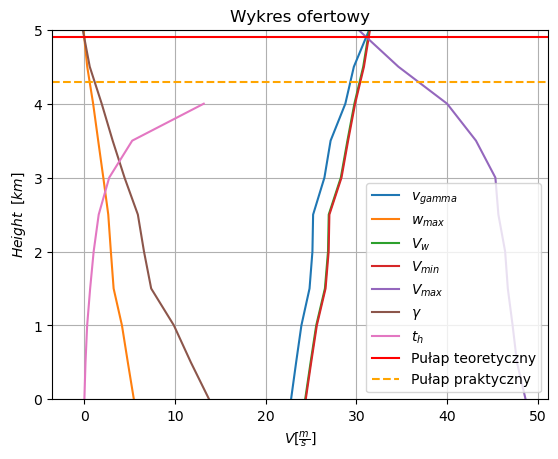

In [14]:
fig,ax = plt.subplots()

ax.plot(v_gamma, heights, label = "$v_{gamma}$")

ax.plot(w_maxes, heights, label = "$w_{max}$")

ax.plot(v_maxes, heights, label = "$V_{w}$")

ax.plot(v_min_i, heights, label = "$V_{min}$")

ax.plot(v_max_i, heights, label = "$V_{max}$")

ax.plot([i*180/3.1415 for i in gamma_max ], heights, label = '$\\gamma$')

ax.plot(th, heights[:-3], label = '$t_h$')

ax.axhline(4.9, color = "red", label = "Pułap teoretyczny")
ax.axhline(4.3, color = "orange", linestyle = 'dashed', label = "Pułap praktyczny")

ax.set_xlabel("$V [\\frac{m}{s}]$")
ax.set_ylabel("$Height\;\;[km]$")

ax.set_ylim([0, 5])

ax.grid()
ax.legend()
ax.set_title("Wykres ofertowy")

plt.savefig("../output/wykres_ofertowy.png", dpi = 200)


plt.show()

## Zasięg i długotrwałość lotu

Masa samolotu:
- m = 650 kg
- Moc nominalna na h = 0, Nn = 64
- Masa Paliwa mf = 80kg 
- jednoskowe zużycie paliwa bj= 0.3148
- gestość powietrza 
- paliwo na start i lądowanie $\Delta m = 16.05 kg$

In [15]:
char = pd.read_table('../input/char_samolotu.txt', sep = '\t')
print(char.columns)


p_samolot_V_cx_i = np.polyfit(char["cx"], char["V_2"], 5)
p_samolot_V_cx = np.poly1d(p_samolot_V_cx_i)
#bierzemy w2

Index(['Cz', 'cx', 'theta_1', 'theta_2', 'gamma', 'V_1', 'w_1', 'V_2', 'w_2',
       'V_3', 'w_3'],
      dtype='object')


In [16]:
def A(V):
    rho = 1.225
    s = 15
    lambda_e = 4.8449
    
    return rho* s*V**2 *(0.05 * math.pi * lambda_e)**(1/2)

def L(v,t):
    return 3.6 * v*t

def T(V, A, eta_s):
    # eta_s = 0.753
    g = 9.81
    rho = 1.225
    s = 15
    lambda_e = 4.8449
    cx0 = 0.05
    qe = 0.34713
    m = 700
    
    return 1000*eta_s/(g* V * qe) * (lambda_e * math.pi/cx0)**(1/2) * (math.atan(2*g*m/A) - math.atan(2*g*(m-60-16)/ A))

In [17]:
# interpolacja eta_s(V) dla h = 0
eta_df = pd.read_csv("../input/sub_tables/height_0.0.csv")
print(eta_df.columns)

# plt.plot(eta_df['V'], eta_df['eta'])

eta_V_i = np.polyfit(eta_df['V'], eta_df['eta'], 4)
p_eta_v = np.poly1d(eta_V_i)

# plt.plot(eta_df["V"], p_eta_v(eta_df['V']))


Index(['Unnamed: 0', 'J', 'Cn', 'eta', 'ns', 'V', 'N', 'Nr'], dtype='object')


In [18]:



zasiegi = pd.DataFrame()
zasiegi["cx"]       = np.linspace(0.05, 0.201, 20)
# zasiegi["cz"]       = p_cz_sam(zasiegi["cx"])
zasiegi["V"]        = p_samolot_V_cx(zasiegi['cx'])
zasiegi["A"]        = A(zasiegi["V"])
zasiegi['eta_s']    = p_eta_v(zasiegi["V"])

for i, row in zasiegi.iterrows():
    
    flight_duration = T(row["V"], row['A'], row['eta_s'])
    
    zasiegi.loc[i, "flight_duration"]   = flight_duration
    zasiegi.loc[i, "range"]             = L(flight_duration, row['V'])   


duration = round(max(zasiegi['flight_duration']),3)
range = round(max(zasiegi['range']),3)


print(f"Maksymalny czas lotu: \t{duration}\t [h]")
print(f"Maksymalny zasięg: \t{range} [km]")

display(zasiegi)

# plt.plot(zasiegi["cx"])


Maksymalny czas lotu: 	6.653	 [h]
Maksymalny zasięg: 	694.421 [km]


,cx,V,A,eta_s,flight_duration,range
0,0.050000,66.937398,71823.629124,0.851020,1.309480,315.551545
1,0.057947,51.134091,41913.195848,0.821159,2.670544,491.601083
2,0.065895,40.750549,26619.299192,0.761053,4.329116,635.089816
3,0.073842,34.401968,18971.263766,0.703448,5.607082,694.420703
4,0.081789,30.930685,15335.882890,0.664051,6.229830,693.694448
5,0.089737,29.388076,13844.331773,0.644581,6.440420,681.377611
6,0.097684,29.016445,13496.404841,0.639703,6.482204,677.125808
7,0.105632,29.230927,13696.665743,0.642527,6.458559,679.642762
8,0.113579,29.601378,14046.029204,0.647348,6.414736,683.586115
9,0.121526,29.834278,14267.923171,0.650342,6.385343,685.807549


In [19]:
to_latex = zasiegi.round(3)
to_latex.to_clipboard()

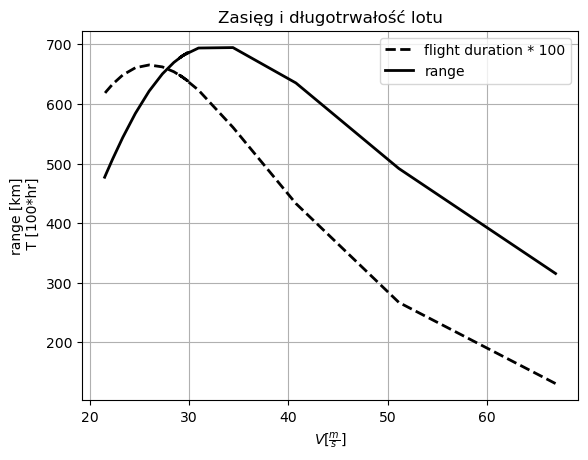

In [20]:
fig, ax = plt.subplots()
ax.plot(zasiegi["V"], zasiegi["flight_duration"]*100, label = "flight duration * 100", linestyle = 'dashed', color = 'black', linewidth = 2)
ax.plot(zasiegi["V"], zasiegi["range"], label = 'range', linestyle = 'solid', color = 'black', linewidth = 2)

ax.set_xlabel("$V [\\frac{m}{s}]$")
ax.set_ylabel("range [km]\n T [100*hr]")
ax.set_title("Zasięg i długotrwałość lotu")

ax.grid(True)
ax.legend()

plt.savefig("../output/zasieg_dlugosc_lotu.png", dpi=200)
